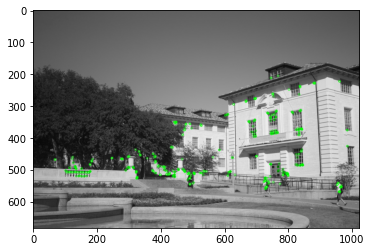

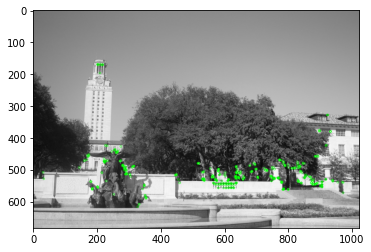

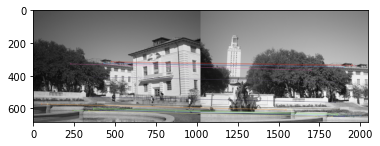

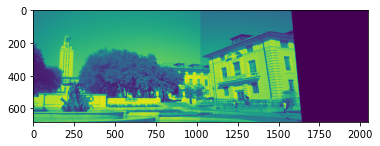

3.4.2


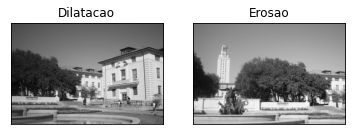

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



imgA = cv2.imread('foto1A.jpg', cv2.IMREAD_GRAYSCALE)


imgB = cv2.imread('foto1B.jpg', cv2.IMREAD_GRAYSCALE)


# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kpA = orb.detect(imgA,None)
# compute the descriptors with ORB
kpA, desA = orb.compute(imgA, kpA)
# draw only keypoints location,not size and orientation
img2A = cv2.drawKeypoints(imgA, kpA, None, color=(0,255,0), flags=0)
plt.imshow(img2A), plt.show()

# find the keypoints with ORB
kpB = orb.detect(imgB,None)
# compute the descriptors with ORB
kpB, desB = orb.compute(imgB, kpB)
# draw only keypoints location,not size and orientation
img2B = cv2.drawKeypoints(imgB, kpB, None, color=(0,255,0), flags=0)
plt.imshow(img2B), plt.show()



sift = cv2.xfeatures2d.SIFT_create()
kpA, featuresA = sift.detectAndCompute(imgA,None)
kpB, featuresB = sift.detectAndCompute(imgB,None)

img=cv2.drawKeypoints(imgA,kpA, None, color=(0,255,0), flags=0)

cv2.imwrite('sift_keypoints.jpg',img)

bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(featuresA,featuresB)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
img3 = cv2.drawMatches(imgA,kpA,imgB, kpB, matches[:20], imgA, flags=2)

plt.imshow(img3),plt.show()

cv2.imwrite('imgJunta.jpg', img3)

src_pts = np.float32([ kpA[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kpB[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

h,w = imgA.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)    
#imgB = cv2.polylines(imgB,[np.int32(dst)],True,255,3, cv2.LINE_AA)
cv2.imwrite("original_image_overlapping.jpg", imgB)

# dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img.shape[0]))
# dst[0:img.shape[0], 0:img.shape[1]] = img

dst = cv2.warpPerspective(imgA,M,((imgA.shape[1] + imgB.shape[1]), imgB.shape[0])) #wraped image
dst[0:imgB.shape[0], 0:imgB.shape[1]] = imgB #stitched image
cv2.imwrite('output.jpg',dst)
plt.imshow(dst)
plt.show()


# FLANN_INDEX_LSH = 6
# index_params= dict(algorithm = FLANN_INDEX_LSH,
#                    table_number = 6, # 12
#                    key_size = 12,     # 20
#                    multi_probe_level = 1) #2
# search_params = dict(checks=100)


# flann = cv2.FlannBasedMatcher(index_params,search_params)

# matches = flann.knnMatch(desA, desB, 2)

# # Need to draw only good matches, so create a mask
# matchesMask = [[0,0] for i in range(len(matches))]

# # ratio test as per Lowe's paper
# for i,(m,n) in enumerate(matches):
#     if m.distance < 0.7*n.distance:
#         matchesMask[i]=[1,0]

# draw_params = dict(matchColor = (0,255,0),
#                    singlePointColor = (255,0,0),
#                    matchesMask = matchesMask,
#                    flags = 0)

# img3 = cv2.drawMatchesKnn(imgA,kpA,imgB,kpB,matches,None,**draw_params)

# plt.imshow(img3,),plt.show()

# cv2.imwrite('img3.jpg', img3)

# store all the good matches as per Lowe's ratio test.
# good = []
# for m,n in matches:
#     if m.distance < 0.7*n.distance:
#         good.append(m)

        
# src_pts = np.float32([ kpA[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
# dst_pts = np.float32([ kpB[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

# M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
# matchesMask = mask.ravel().tolist()


# dst = cv2.warpPerspective(imgA, M, ((imgA.shape[1] + imgB.shape[1]), imgB.shape[0])) #wraped image

# # now paste them together
# dst[0:imgB.shape[0], 0:imgB.shape[1]] = imgB
# dst[0:imgA.shape[0], 0:imgA.shape[1]] = imgA


print(cv2.__version__)
plt.subplot(121),plt.imshow(imgA, cmap = 'gray')
plt.title('Dilatacao'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imgB, cmap = 'gray')
plt.title('Erosao'), plt.xticks([]), plt.yticks([])
plt.show()
